In [592]:
import pandas as pd
import dtale
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score
import glob
import dask.dataframe as dd
import xarray as xr
from scipy import stats

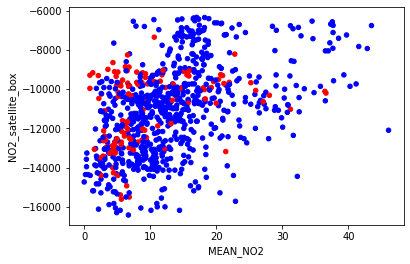

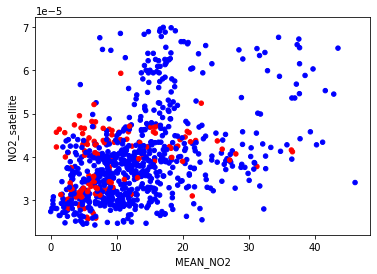

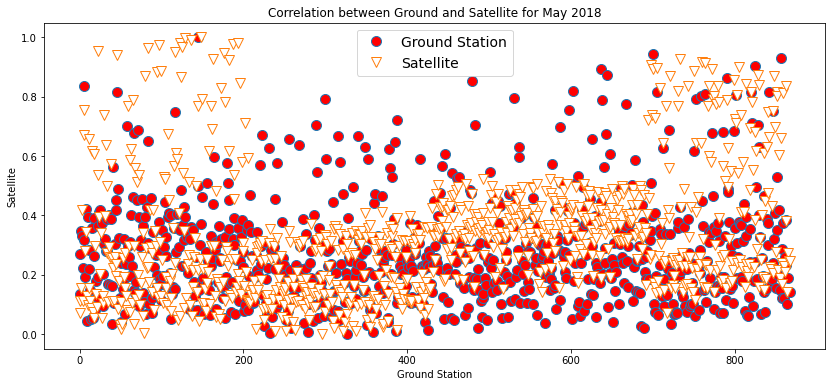

In [593]:
#Calculation for May 2018

df_May_2018= pd.read_csv('2018 May Grnd.csv')
df=df_May_2018

MEAN_NO2_may=df['MEAN_NO2'].values
NO2_satellite_may=df['NO2_satellite'].values

df['NO2_satellite_box'],_ = stats.boxcox(df['NO2_satellite'])
colors = np.where(df.COUNT > 300, 'r', 'b')
df.plot.scatter(x='MEAN_NO2',y='NO2_satellite_box', c=colors)
df.plot.scatter(x='MEAN_NO2',y='NO2_satellite', c=colors)

scaler=MinMaxScaler()
MEAN_NO2=df['MEAN_NO2'].values
MEAN_NO2=MEAN_NO2.reshape(-1,1)
MEAN_NO2=scaler.fit_transform(MEAN_NO2)


NO2_satellite=df['NO2_satellite'].values
NO2_satellite=NO2_satellite.reshape(-1,1)
NO2_satellite=scaler.fit_transform(NO2_satellite)



df['MEAN_NO2_T']= pd.DataFrame(MEAN_NO2)
df['NO2_satellite_T']= pd.DataFrame(NO2_satellite)

#df.corr()['MEAN_NO2_T'].sort_values().plot(kind='bar')

fig = plt.figure(figsize=(14,6))
plt.plot(MEAN_NO2,marker="o", ms = 10, mfc = 'r', linestyle='None',label='Ground Station')
plt.plot(NO2_satellite,marker="v", ms = 10,linestyle='None', mfc = 'w',label='Satellite')
plt.title('Correlation between Ground and Satellite for May 2018')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Ground Station')
plt.ylabel('Satellite')



corr=df.corr()['MEAN_NO2'].sort_values()

corr=list(corr)

grnd_corr_may=corr[2]



In [594]:
#Reading CAMs Data for May 2018
no2_may = xr.open_dataset("CAMS_2018_May_12.00_Surface.nc", engine="netcdf4")
no2_may

<xarray.Dataset>
Dimensions:    (latitude: 1441, longitude: 2880, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.125 0.25 0.375 ... 359.6 359.8 359.9
  * latitude   (latitude) float32 90.0 89.88 89.75 89.62 ... -89.75 -89.88 -90.0
  * time       (time) datetime64[ns] 2018-05-01T12:00:00 ... 2018-05-31T12:00:00
Data variables:
    tcno2      (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    lsp        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-21 23:32:19 GMT by grib_to_netcdf-2.21.0: grib_to_n...

In [595]:
#Extracting Each Variables 
tno2_may=no2_may.tcno2
u10_may=no2_may.u10
v10_may=no2_may.v10
t2m_may=no2_may.t2m
lsp_may=no2_may.lsp

In [596]:
u10_may.data.shape

(31, 1441, 2880)

In [597]:
#Finding the index for particular Lat and Lon
lat_ind= np.where(tno2_may.latitude.data==38) 
lon_ind= np.where(tno2_may.longitude.data==122)
lat_ind=int(lat_ind[0])
lon_ind=int(lon_ind[0])
print(no2_may.longitude.data[lon_ind:lon_ind+14])
print(tno2_may.latitude.data[lat_ind:lat_ind+14])

[122.    122.125 122.25  122.375 122.5   122.625 122.75  122.875 123.
 123.125 123.25  123.375 123.5   123.625]
[38.    37.875 37.75  37.625 37.5   37.375 37.25  37.125 37.    36.875
 36.75  36.625 36.5   36.375]


In [598]:
#Extracting No2 for the bay area for The Month of May
cams_no2=[]
for i in range(31):
   cams_no2_1=list(tno2_may.data[i,lon_ind:lon_ind+14,122])
   cams_no2_2=list(tno2_may.data[i,37,lat_ind:lat_ind+14])
   cams_no2=cams_no2+cams_no2_1+cams_no2_2
   #print(cams_no2)

In [599]:
#Extracting u10 (10 metre U wind component) for the bay area for The Month of May
cams_u10=[]
for i in range(31):
   cams_u10_1=list(u10_may.data[i,lon_ind:lon_ind+14,122])
   cams_u10_2=list(u10_may.data[i,37,lat_ind:lat_ind+14])
   cams_u10=cams_u10+cams_u10_1+cams_u10_2

In [600]:
#Extracting v10 (10 metre V wind component) for the bay area for The Month of May
cams_v10=[]
for i in range(31):
   cams_v10_1=list(v10_may.data[i,lon_ind:lon_ind+14,122])
   cams_v10_2=list(v10_may.data[i,37,lat_ind:lat_ind+14])
   cams_v10=cams_v10+cams_v10_1+cams_v10_2


In [601]:
#Extracting t2m (2 metre temperature) for the bay area for The Month of May
cams_t2m=[]
for i in range(31):
   cams_t2m_1=list(t2m_may.data[i,lon_ind:lon_ind+14,122])
   cams_t2m_2=list(t2m_may.data[i,37,lat_ind:lat_ind+14])
   cams_t2m=cams_t2m+cams_t2m_1+cams_t2m_2


In [602]:
#Extracting lsp (Large-scale precipitation) for the bay area for The Month of May
cams_lsp=[]
for i in range(31):
   cams_lsp_1=list(lsp_may.data[i,lon_ind:lon_ind+14,122])
   cams_lsp_2=list(lsp_may.data[i,37,lat_ind:lat_ind+14])
   cams_lsp=cams_lsp+cams_lsp_1+cams_lsp_2

In [603]:
df['cams_no2']=cams_no2
df['cams_u10']=cams_u10
df['cams_v10']=cams_v10
df['cams_t2m']=cams_t2m
df['cams_t2m']=cams_lsp

In [604]:
df=df.drop(['COUNT','NO2_satellite_box','NO2_satellite_T'],axis=1)

In [605]:
dtale.show(df)

In [606]:
X=df.drop('MEAN_NO2',axis=1).values
y=df['MEAN_NO2'].values

In [607]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [608]:
model=Sequential()
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(loss='mse',optimizer='adam')
model.fit(x=X_train,y=y_train, epochs=300,validation_data=(X_test,y_test))

Epoch 1/300
19/19 [==============================] - 1s 15ms/step - loss: 69.3749 - val_loss: 62.7454
Epoch 2/300
19/19 [==============================] - 0s 3ms/step - loss: 69.0565 - val_loss: 62.2771
Epoch 3/300
19/19 [==============================] - 0s 3ms/step - loss: 68.2376 - val_loss: 62.4278
Epoch 4/300
19/19 [==============================] - 0s 3ms/step - loss: 68.4056 - val_loss: 62.9521
Epoch 5/300
19/19 [==============================] - 0s 4ms/step - loss: 68.4687 - val_loss: 62.2031
Epoch 6/300
19/19 [==============================] - 0s 3ms/step - loss: 68.0649 - val_loss: 62.0238
Epoch 7/300
19/19 [==============================] - 0s 4ms/step - loss: 67.7893 - val_loss: 62.2694
Epoch 8/300
19/19 [==============================] - 0s 4ms/step - loss: 67.5304 - val_loss: 61.9989
Epoch 9/300
19/19 [==============================] - 0s 3ms/step - loss: 67.5457 - val_loss: 61.6906
Epoch 10/300
19/19 [==============================] - 0s 3ms/step - loss: 67.1554 - val_lo

19/19 [==============================] - 0s 2ms/step - loss: 59.5239 - val_loss: 53.5529
Epoch 82/300
19/19 [==============================] - 0s 4ms/step - loss: 61.1661 - val_loss: 53.1470
Epoch 83/300
19/19 [==============================] - 0s 3ms/step - loss: 61.8712 - val_loss: 52.9369
Epoch 84/300
19/19 [==============================] - 0s 3ms/step - loss: 58.0666 - val_loss: 52.4763
Epoch 85/300
19/19 [==============================] - 0s 3ms/step - loss: 57.7828 - val_loss: 53.2534
Epoch 86/300
19/19 [==============================] - 0s 2ms/step - loss: 57.2383 - val_loss: 52.7111
Epoch 87/300
19/19 [==============================] - 0s 2ms/step - loss: 56.4652 - val_loss: 51.1951
Epoch 88/300
19/19 [==============================] - 0s 2ms/step - loss: 56.2761 - val_loss: 51.1296
Epoch 89/300
19/19 [==============================] - 0s 2ms/step - loss: 56.1879 - val_loss: 50.4108
Epoch 90/300
19/19 [==============================] - 0s 2ms/step - loss: 55.1547 - val_loss: 5

19/19 [==============================] - 0s 2ms/step - loss: 0.0948 - val_loss: 0.0925
Epoch 162/300
19/19 [==============================] - 0s 3ms/step - loss: 0.1019 - val_loss: 0.1352
Epoch 163/300
19/19 [==============================] - 0s 3ms/step - loss: 0.1081 - val_loss: 0.1206
Epoch 164/300
19/19 [==============================] - 0s 3ms/step - loss: 0.0920 - val_loss: 0.0814
Epoch 165/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0818 - val_loss: 0.0790
Epoch 166/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0763 - val_loss: 0.0830
Epoch 167/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0877 - val_loss: 0.0977
Epoch 168/300
19/19 [==============================] - 0s 3ms/step - loss: 0.0975 - val_loss: 0.0977
Epoch 169/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0856 - val_loss: 0.0888
Epoch 170/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0779 - val_loss: 0.0798
Epoc

19/19 [==============================] - 0s 2ms/step - loss: 0.0726 - val_loss: 0.0738
Epoch 243/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0684 - val_loss: 0.0735
Epoch 244/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0690 - val_loss: 0.1043
Epoch 245/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0703 - val_loss: 0.0815
Epoch 246/300
19/19 [==============================] - 0s 3ms/step - loss: 0.1115 - val_loss: 0.2003
Epoch 247/300
19/19 [==============================] - 0s 2ms/step - loss: 0.1204 - val_loss: 0.0980
Epoch 248/300
19/19 [==============================] - 0s 3ms/step - loss: 0.0922 - val_loss: 0.1091
Epoch 249/300
19/19 [==============================] - 0s 4ms/step - loss: 0.0830 - val_loss: 0.1219
Epoch 250/300
19/19 [==============================] - 0s 2ms/step - loss: 0.0857 - val_loss: 0.0728
Epoch 251/300
19/19 [==============================] - 0s 3ms/step - loss: 0.1034 - val_loss: 0.0809
Epoc

Text(0, 0.5, 'Loss')

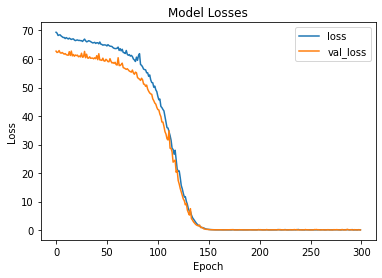

In [609]:
losses=pd.DataFrame(model.history.history)
losses.plot()
plt.title('Model Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [610]:
prediction=model.predict(X_test)
MSE=mean_squared_error(y_test,prediction)
print("Mean Squared Error =",MSE)

Mean Squared Error = 0.06811513789334903


In [611]:
RMSE=mean_squared_error(y_test,prediction, squared=False)
print("Root Mean Square Error =",RMSE)

Root Mean Square Error = 0.26098876966902046


Text(0, 0.5, 'Predicted  No2 (mol/m2)')

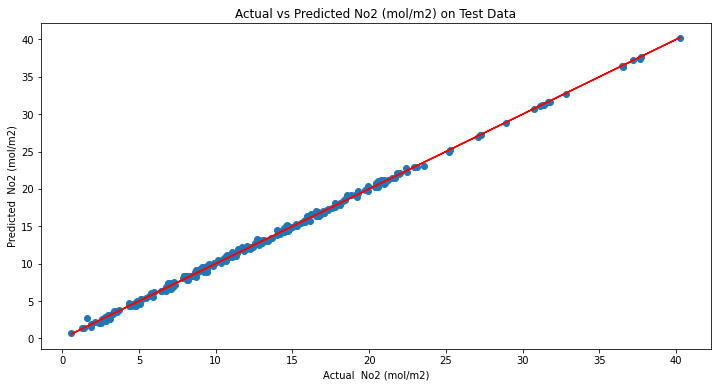

In [612]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,prediction)
plt.plot(y_test,y_test,'r')
plt.title('Actual vs Predicted No2 (mol/m2) on Test Data')
plt.xlabel('Actual  No2 (mol/m2)')
plt.ylabel('Predicted  No2 (mol/m2)')

In [613]:
X_all=scaler.transform(X)
all_prediction=model.predict(X_all)

ValueError: X has 8 features, but MinMaxScaler is expecting 1 features as input.

In [ ]:
Mean_no2=df['MEAN_NO2']

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(Mean_no2,all_prediction)
plt.plot(Mean_no2,Mean_no2,'r')
plt.title('Actual vs Predicted No2 (mol/m2) on Whole Data')
plt.xlabel('Actual  No2 (mol/m2)')
plt.ylabel('Predicted  No2 (mol/m2)')